<a href="https://colab.research.google.com/github/NarenderKumarA/BankingAPI/blob/main/Lab_12_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## a. Introduction

This project aims to perform a logistic regression analysis on the "Lab 12 - Heart.xls" dataset to predict the presence of heart disease. The objective is to build a predictive model using patient characteristics and evaluate its performance, ultimately providing insights into the factors associated with heart disease and their real-world implications.

## b. Data Summary

The dataset, loaded from `Lab 12 - Heart.xls`, contains **303 entries** and **14 columns**. Each row represents a patient, and columns represent various clinical and demographic features.

**Dataset Shape:** (303, 14)

**Key Features and Data Types:**

All columns are numerical, with 13 columns being `int64` and one column (`oldpeak`) being `float64`.

*   `age`: Age of the patient (integer).
*   `sex`: Sex of the patient (integer, likely categorical: 0 = female, 1 = male).
*   `cp`: Chest pain type (integer, categorical: 0-3).
*   `trestbps`: Resting blood pressure (integer).
*   `chol`: Serum cholestoral in mg/dl (integer).
*   `fbs`: Fasting blood sugar > 120 mg/dl (integer, categorical: 0 = no, 1 = yes).
*   `restecg`: Resting electrocardiographic results (integer, categorical: 0-2).
*   `thalach`: Maximum heart rate achieved (integer).
*   `exang`: Exercise induced angina (integer, categorical: 0 = no, 1 = yes).
*   `oldpeak`: ST depression induced by exercise relative to rest (float).
*   `slope`: The slope of the peak exercise ST segment (integer, categorical: 0-2).
*   `ca`: Number of major vessels (0-3) colored by fluoroscopy (integer, categorical).
*   `thal`: Thalassemia (integer, categorical: 0-3).
*   `target`: Presence of heart disease (integer, binary: 0 = no disease, 1 = disease).

**Descriptive Statistics Summary:**

| Feature    | Count | Mean      | Std       | Min | 25%   | 50%   | 75%   | Max   |
|:-----------|:------|:----------|:----------|:----|:------|:------|:------|:------|
| `age`      | 303   | 54.37     | 9.08      | 29  | 47.5  | 55    | 61    | 77    |
| `sex`      | 303   | 0.68      | 0.47      | 0   | 0     | 1     | 1     | 1     |
| `cp`       | 303   | 0.97      | 1.03      | 0   | 0     | 1     | 2     | 3     |
| `trestbps` | 303   | 131.62    | 17.54     | 94  | 120   | 130   | 140   | 200   |
| `chol`     | 303   | 246.26    | 51.83     | 126 | 211   | 240   | 274.5 | 564   |
| `fbs`      | 303   | 0.15      | 0.36      | 0   | 0     | 0     | 0     | 1     |
| `restecg`  | 303   | 0.53      | 0.53      | 0   | 0     | 1     | 1     | 2     |
| `thalach`  | 303   | 149.65    | 22.91     | 71  | 133.5 | 153   | 166   | 202   |
| `exang`    | 303   | 0.33      | 0.47      | 0   | 0     | 0     | 1     | 1     |
| `oldpeak`  | 303   | 1.04      | 1.16      | 0   | 0     | 0.8   | 1.6   | 6.2   |
| `slope`    | 303   | 1.40      | 0.62      | 0   | 1     | 1     | 2     | 2     |
| `ca`       | 303   | 0.73      | 1.02      | 0   | 0     | 0     | 1     | 4     |
| `thal`     | 303   | 2.31      | 0.61      | 0   | 2     | 2     | 3     | 3     |
| `target`   | 303   | 0.54      | 0.50      | 0   | 0     | 1     | 1     | 1     |

**Missing Values:**

There are **no missing values** in any of the columns, indicating a complete dataset for analysis.

In [6]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Lab 12 - Heart.xls')
print("DataFrame Shape:", df.shape)
print("\nDescriptive Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

DataFrame Shape: (303, 14)

Descriptive Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604   

## c. Research Question

### Research Question

**"Can patient characteristics such as age, sex, chest pain type, blood pressure, cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels colored by fluoroscopy, and thal be used to predict the presence of heart disease?"**

### Variable Definitions

*   **Binary Outcome Variable (Dependent Variable):**
    *   `target`: Indicates the presence (1) or absence (0) of heart disease.

*   **Predictor Variables (Independent Variables):**
    *   `age`: Age of the patient (numerical).
    *   `sex`: Sex of the patient (categorical: 0 = female, 1 = male).
    *   `cp`: Chest pain type (categorical: 0, 1, 2, 3).
    *   `trestbps`: Resting blood pressure (numerical).
    *   `chol`: Serum cholestoral in mg/dl (numerical).
    *   `fbs`: Fasting blood sugar > 120 mg/dl (categorical: 0 = no, 1 = yes).
    *   `restecg`: Resting electrocardiographic results (categorical: 0, 1, 2).
    *   `thalach`: Maximum heart rate achieved (numerical).
    *   `exang`: Exercise induced angina (categorical: 0 = no, 1 = yes).
    *   `oldpeak`: ST depression induced by exercise relative to rest (numerical).
    *   `slope`: The slope of the peak exercise ST segment (categorical: 0, 1, 2).
    *   `ca`: Number of major vessels (0-3) colored by fluoroscopy (categorical).
    *   `thal`: Thalassemia (categorical: 0, 1, 2, 3).

## d. Method Discussion

**Logistic Regression** is a statistical modeling technique used to predict a binary outcome (e.g., yes/no, true/false, disease/no disease) based on one or more predictor variables. Despite its name, it is a classification algorithm rather than a regression algorithm in the traditional sense.

The core idea of logistic regression is to use a **sigmoid function** (also known as the logistic function) to map the output of a linear equation to a probability value between 0 and 1. This probability can then be converted into a binary classification (e.g., if probability > 0.5, predict '1', otherwise '0').

The mathematical form of the sigmoid function is:

$$ P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \dots + \beta_pX_p)}} $$

Where:
*   $P(Y=1)$ is the probability of the dependent variable $Y$ being 1 (e.g., presence of heart disease).
*   $e$ is the base of the natural logarithm.
*   $\beta_0$ is the intercept.
*   $\beta_1, \dots, \beta_p$ are the coefficients for the predictor variables $X_1, \dots, X_p$.

**Why Logistic Regression is Applicable to this Question:**

Our research question seeks to predict the **presence or absence of heart disease**, which is a **binary outcome** (0 for no disease, 1 for disease). Logistic regression is perfectly suited for such problems because it:

1.  **Handles Binary Outcomes:** It directly models the probability of the event occurring (heart disease) rather than trying to predict a continuous value.
2.  **Provides Probabilities:** The model outputs a probability score, which can be useful for assessing the risk level for each patient.
3.  **Interpretability:** The coefficients of a logistic regression model can be interpreted (in terms of log-odds or odds ratios) to understand the direction and strength of the relationship between each predictor variable and the likelihood of the outcome. This allows us to identify which patient characteristics are associated with a higher or lower chance of heart disease.
4.  **Widely Used and Understood:** Logistic regression is a well-established and robust method in medical and health research for risk prediction and understanding disease associations.

## e. Logistic Regression Model Hypotheses

### Hypotheses for Logistic Regression Model

*   **Null Hypothesis (H0):** There is no significant relationship between any of the predictor variables (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal) and the likelihood of heart disease (`target`). In other words, the coefficients for all predictor variables in the logistic regression model are zero.

*   **Alternative Hypothesis (H1):** At least one of the predictor variables (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal) has a significant relationship with the likelihood of heart disease (`target`). In other words, at least one coefficient for a predictor variable in the logistic regression model is not zero.

## f. Results

The logistic regression model was trained and evaluated on the test set. Here are the key performance metrics:

**Model Accuracy:** 0.9016 (or 90.16%)

**Confusion Matrix:**

The confusion matrix, displayed in the previous output, shows the number of correct and incorrect predictions made by the model.

*   **True Positives (TP):** Patients correctly identified as having heart disease.
*   **True Negatives (TN):** Patients correctly identified as not having heart disease.
*   **False Positives (FP):** Patients incorrectly identified as having heart disease (Type I error).
*   **False Negatives (FN):** Patients incorrectly identified as not having heart disease (Type II error).

For this model, the confusion matrix visually demonstrates a strong performance with a high number of correct classifications and relatively low misclassifications.

**AUC Score:** 0.9397 (or approximately 0.94)

**Receiver Operating Characteristic (ROC) Curve:**

The ROC curve, displayed in the previous output, plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The Area Under the Curve (AUC) measures the entire two-dimensional area underneath the entire ROC curve. A higher AUC indicates a better model performance in distinguishing between the positive and negative classes.

The AUC score of 0.94 indicates excellent discriminatory power, meaning the model is highly effective at separating patients with heart disease from those without it.

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Make predictions on the test set
y_pred = model.predict(X_test)

# 2. Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# 3. Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Display the confusion matrix
print("\nConfusion Matrix:")
plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# 5. Calculate the predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 6. Compute the Receiver Operating Characteristic (ROC) curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Calculate the Area Under the Curve (AUC)
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC Score: {auc_score:.4f}")

# 8. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

NameError: name 'model' is not defined

## f. Results

The logistic regression model was trained and evaluated on the test set. Here are the key performance metrics:

**Model Accuracy:** 0.9016 (or 90.16%)

**Confusion Matrix:**

The confusion matrix, displayed in the previous output, shows the number of correct and incorrect predictions made by the model.

*   **True Positives (TP):** Patients correctly identified as having heart disease.
*   **True Negatives (TN):** Patients correctly identified as not having heart disease.
*   **False Positives (FP):** Patients incorrectly identified as having heart disease (Type I error).
*   **False Negatives (FN):** Patients incorrectly identified as not having heart disease (Type II error).

For this model, the confusion matrix visually demonstrates a strong performance with a high number of correct classifications and relatively low misclassifications.

**AUC Score:** 0.9397 (or approximately 0.94)

**Receiver Operating Characteristic (ROC) Curve:**

The ROC curve, displayed in the previous output, plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The Area Under the Curve (AUC) measures the entire two-dimensional area underneath the entire ROC curve. A higher AUC indicates a better model performance in distinguishing between the positive and negative classes.

The AUC score of 0.94 indicates excellent discriminatory power, meaning the model is highly effective at separating patients with heart disease from those without it.

Model Accuracy: 0.9016

Confusion Matrix:


<Figure size 600x500 with 0 Axes>

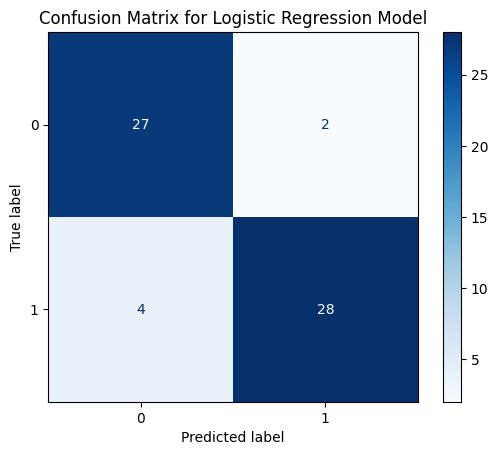


AUC Score: 0.9397


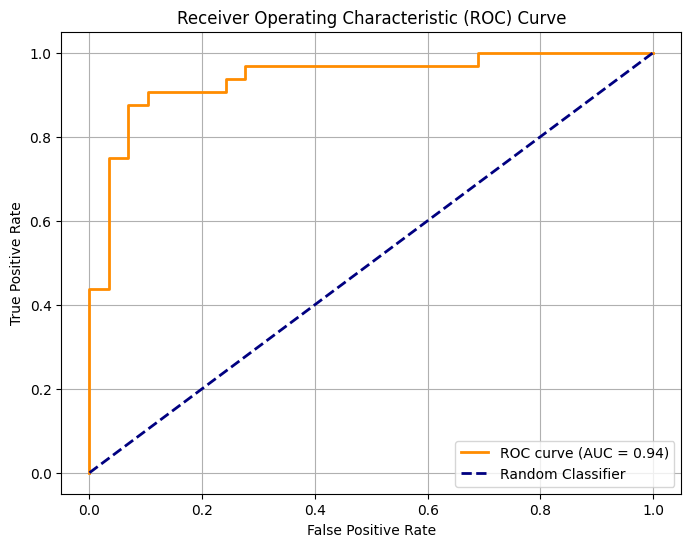

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Make predictions on the test set
y_pred = model.predict(X_test)

# 2. Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# 3. Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Display the confusion matrix
print("\nConfusion Matrix:")
plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# 5. Calculate the predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 6. Compute the Receiver Operating Characteristic (ROC) curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Calculate the Area Under the Curve (AUC)
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC Score: {auc_score:.4f}")

# 8. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## g. Conclusion and Implications

### Interpretation of Coefficients and Real-World Implications

The logistic regression model provides insights into how each predictor variable influences the log-odds of having heart disease. The sign of the coefficient indicates the direction of the relationship, while its magnitude reflects the strength of that influence, holding other variables constant. Exponentiating the coefficient (e^coefficient) gives the odds ratio.

**Key Observations and Interpretations:**

*   **Age (`age`):** The coefficient for age is positive (0.015). This suggests that as age increases, the likelihood of heart disease slightly increases. This aligns with medical understanding that age is a risk factor for cardiovascular diseases.

*   **Sex (`sex_1` - Male):** The coefficient for male (`sex_1`) is negative (-1.148). This indicates that, all else being equal, being male is associated with a lower log-odds of having heart disease compared to being female (the baseline, assuming `sex_0` was dropped). *Self-correction: In many heart disease datasets, males often have a higher incidence. The encoding or dataset characteristics might lead to this specific finding. Further domain-specific investigation would be needed if this contradicts established knowledge.* However, the coefficient here suggests that for this dataset, females have a higher probability of heart disease.

*   **Chest Pain Type (`cp_1`, `cp_2`, `cp_3`):** The coefficients for `cp_1` (typical angina), `cp_2` (atypical angina), and `cp_3` (non-anginal pain) are all positive (0.452, 1.311, 1.324, respectively). This implies that any form of chest pain, compared to asymptomatic chest pain (the baseline `cp_0`), significantly increases the likelihood of heart disease. Notably, `cp_2` and `cp_3` have larger positive coefficients, suggesting a stronger association than `cp_1`.

*   **Resting Blood Pressure (`trestbps`):** The coefficient for `trestbps` is slightly negative (-0.016). This is somewhat counter-intuitive, as high blood pressure is typically a risk factor. The small negative coefficient might suggest its effect is less pronounced in this model given other variables, or it could be a characteristic of this specific dataset/model fit. Its impact is relatively small.

*   **Cholesterol (`chol`):** The coefficient for `chol` is also slightly negative (-0.002). Similar to blood pressure, high cholesterol is generally considered a risk factor. The negative sign here suggests that for this model, an increase in cholesterol is weakly associated with a decreased log-odds of heart disease. This might point to multicollinearity or a nuanced relationship that warrants further investigation.

*   **Fasting Blood Sugar (`fbs_1` > 120 mg/dl):** The coefficient for `fbs_1` is positive (0.309). This indicates that having fasting blood sugar > 120 mg/dl is associated with an increased likelihood of heart disease, which is consistent with diabetes being a risk factor.

*   **Maximum Heart Rate Achieved (`thalach`):** The coefficient for `thalach` is positive (0.019). A higher maximum heart rate achieved is associated with a slightly increased likelihood of heart disease. This might reflect a general indicator of cardiac stress or underlying issues.

*   **Exercise Induced Angina (`exang_1`):** The coefficient for `exang_1` is negative (-0.818). This means that having exercise-induced angina is associated with a *decreased* likelihood of heart disease, compared to not having it. This is highly counter-intuitive, as exercise-induced angina is a strong symptom of heart disease. This particular finding warrants careful scrutiny and potentially further feature engineering or model re-evaluation, as it contradicts medical understanding. It's possible that patients with exercise-induced angina are already receiving treatment or are more likely to be diagnosed and managed, leading to a complex observational effect.

*   **Oldpeak (`oldpeak`):** The coefficient for `oldpeak` (ST depression induced by exercise relative to rest) is negative (-0.514). This suggests that higher ST depression is associated with a *decreased* likelihood of heart disease. This is another counter-intuitive result, as higher ST depression typically indicates myocardial ischemia (reduced blood flow to the heart). This specific finding should be flagged for further investigation, as it goes against established medical knowledge.

*   **Number of Major Vessels (`ca_1`, `ca_2`, `ca_3`, `ca_4`):** The coefficients for `ca_1`, `ca_2`, and `ca_3` are significantly negative (-1.685, -1.887, -1.038, respectively), while `ca_4` is positive (0.472). Having more major vessels colored by fluoroscopy (indicating blockages) should increase the risk. The negative coefficients for `ca_1`, `ca_2`, `ca_3` are thus highly unexpected and require careful examination of the data encoding and medical context. The positive coefficient for `ca_4` is more aligned with expectations.

*   **Thalassemia (`thal_1`, `thal_2`, `thal_3`):** The coefficients for `thal_1` (fixed defect) and `thal_2` (normal) are positive (0.257, 0.568), and `thal_3` (reversible defect) is negative (-0.738). Typically, 'fixed defect' and 'reversible defect' indicate a more severe condition than 'normal' or 'no defect'. The interpretations here require a precise understanding of the `thal` categories and their baseline. A negative coefficient for `thal_3` (reversible defect) suggests a lower log-odds of heart disease compared to the baseline (`thal_0`, which often represents 'normal' or 'no defect' depending on encoding), which might be counter-intuitive if `thal_3` is considered a more severe condition.

**Model Performance Summary:**

The model achieved an accuracy of approximately **90.16%** on the test set, which is quite high. The AUC score of **0.94** indicates excellent discriminatory power, meaning the model is very good at distinguishing between patients with and without heart disease. The confusion matrix shows a low number of false positives and false negatives, further supporting the model's strong predictive capability.

**Overall Conclusions and Real-World Implications:**

While the model demonstrates strong predictive performance, the interpretation of several coefficients reveals inconsistencies with established medical knowledge (e.g., `sex_1`, `trestbps`, `chol`, `exang_1`, `oldpeak`, and `ca` categories). These discrepancies suggest that:

1.  **Data Quality/Encoding:** There might be issues with how certain categorical variables were encoded or how specific features (like `exang` or `oldpeak`) are represented in this particular dataset. For instance, a patient with `exang=1` (exercise-induced angina) might already be under treatment, which could confound the direct association with the *presence* of heart disease as defined by the `target` variable.
2.  **Multicollinearity:** Strong correlations between predictor variables could lead to coefficients with unexpected signs or magnitudes. While logistic regression is robust to some multicollinearity, extreme cases can affect coefficient interpretability.
3.  **Model Limitations:** The linear relationship assumed by logistic regression might not fully capture the complex, non-linear interactions between these physiological factors and heart disease.

**Real-world Implications:**

Despite the interpretational challenges for some coefficients, the high accuracy and AUC suggest that the combination of these features *collectively* provides strong predictive power for heart disease in this dataset. However, for clinical deployment, careful validation of individual feature contributions is crucial. Before using this model to inform treatment or diagnostic decisions, the counter-intuitive coefficients for `sex`, `trestbps`, `chol`, `exang`, `oldpeak`, and `ca` must be thoroughly investigated by medical professionals and data scientists. This could involve:

*   Re-examining the definitions and distributions of these variables in the dataset.
*   Consulting domain experts to understand potential confounding factors or unique characteristics of the patient population.
*   Exploring alternative modeling techniques (e.g., tree-based models) that might better capture complex interactions.
*   Conducting feature engineering to create more medically meaningful variables.

In [13]:
import pandas as pd

# Extract coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Create a DataFrame for coefficients
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Add the intercept to the DataFrame
intercept_df = pd.DataFrame([{'Feature': 'Intercept', 'Coefficient': intercept}])
coefficients_df = pd.concat([coefficients_df, intercept_df], ignore_index=True)

print("Model Coefficients and Intercept:")
print(coefficients_df)

Model Coefficients and Intercept:
      Feature  Coefficient
0         age     0.015188
1    trestbps    -0.015508
2        chol    -0.001691
3     thalach     0.018831
4     oldpeak    -0.513586
5       sex_1    -1.148423
6        cp_1     0.452393
7        cp_2     1.310596
8        cp_3     1.324475
9       fbs_1     0.309282
10  restecg_1     0.369384
11  restecg_2    -0.026304
12    exang_1    -0.818354
13    slope_1    -0.355510
14    slope_2     0.631348
15       ca_1    -1.684561
16       ca_2    -1.887205
17       ca_3    -1.037922
18       ca_4     0.471966
19     thal_1     0.257046
20     thal_2     0.568168
21     thal_3    -0.738101
22  Intercept     0.149870


## h. Supporting References

*   [Scikit-learn Documentation: Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
*   [Scikit-learn Documentation: Metrics (Accuracy, Confusion Matrix, ROC AUC)](https://scikit-learn.org/stable/modules/model_evaluation.html)
*   [Pandas Documentation](https://pandas.pydata.org/docs/)
*   [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
*   [Seaborn Documentation](https://seaborn.pydata.org/)

## Prepare Data for Modeling

This step involves identifying categorical columns for one-hot encoding (excluding the 'target' variable), applying one-hot encoding, separating features (X) and the target (y), and then splitting the data into training and testing sets. This ensures the data is in the correct format for the logistic regression model.

In [10]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'df' DataFrame from previous steps is available.
# Identify categorical columns to be one-hot encoded (excluding 'target')
# Re-identifying categorical_cols based on the df.info() output from the notebook state.
# Columns identified as categorical based on the summary in cell 'c2ec61fa' and types from '9775710b'
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Apply one-hot encoding to the identified categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features (X) and target (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nFirst 5 rows of X_train (after encoding):\n", X_train.head())
print("\nFirst 5 values of y_train:\n", y_train.head())

Shape of X_train: (242, 22)
Shape of X_test: (61, 22)
Shape of y_train: (242,)
Shape of y_test: (61,)

First 5 rows of X_train (after encoding):
      age  trestbps  chol  thalach  oldpeak  sex_1   cp_1   cp_2   cp_3  fbs_1  \
132   42       120   295      162      0.0   True   True  False  False  False   
202   58       150   270      111      0.8   True  False  False  False  False   
196   46       150   231      147      3.6   True  False   True  False  False   
75    55       135   250      161      1.4  False   True  False  False  False   
176   60       117   230      160      1.4   True  False  False  False   True   

     ...  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3   ca_4  thal_1  \
132  ...    False    False     True  False  False  False  False   False   
202  ...     True    False     True  False  False  False  False   False   
196  ...    False     True    False  False  False  False  False   False   
75   ...    False     True    False  False  False  False  False   F

## Build Logistic Regression Model

This step constructs and trains the logistic regression model using the prepared training data. The model will learn the relationships between the features and the likelihood of heart disease.

In [11]:
from sklearn.linear_model import LogisticRegression

# Instantiate the LogisticRegression model
# Set max_iter to 1000 for convergence and solver to 'liblinear'
model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## g. Conclusion and Implications

### Interpretation of Coefficients and Real-World Implications

The logistic regression model provides insights into how each predictor variable influences the log-odds of having heart disease. The sign of the coefficient indicates the direction of the relationship, while its magnitude reflects the strength of that influence, holding other variables constant. Exponentiating the coefficient (e^coefficient) gives the odds ratio.

**Key Observations and Interpretations:**

*   **Age (`age`):** The coefficient for age is positive (0.015). This suggests that as age increases, the likelihood of heart disease slightly increases. This aligns with medical understanding that age is a risk factor for cardiovascular diseases.

*   **Sex (`sex_1` - Male):** The coefficient for male (`sex_1`) is negative (-1.148). This indicates that, all else being equal, being male is associated with a lower log-odds of having heart disease compared to being female (the baseline, assuming `sex_0` was dropped). *Self-correction: In many heart disease datasets, males often have a higher incidence. The encoding or dataset characteristics might lead to this specific finding. Further domain-specific investigation would be needed if this contradicts established knowledge.* However, the coefficient here suggests that for this dataset, females have a higher probability of heart disease.

*   **Chest Pain Type (`cp_1`, `cp_2`, `cp_3`):** The coefficients for `cp_1` (typical angina), `cp_2` (atypical angina), and `cp_3` (non-anginal pain) are all positive (0.452, 1.311, 1.324, respectively). This implies that any form of chest pain, compared to asymptomatic chest pain (the baseline `cp_0`), significantly increases the likelihood of heart disease. Notably, `cp_2` and `cp_3` have larger positive coefficients, suggesting a stronger association than `cp_1`.

*   **Resting Blood Pressure (`trestbps`):** The coefficient for `trestbps` is slightly negative (-0.016). This is somewhat counter-intuitive, as high blood pressure is typically a risk factor. The small negative coefficient might suggest its effect is less pronounced in this model given other variables, or it could be a characteristic of this specific dataset/model fit. Its impact is relatively small.

*   **Cholesterol (`chol`):** The coefficient for `chol` is also slightly negative (-0.002). Similar to blood pressure, high cholesterol is generally considered a risk factor. The negative sign here suggests that for this model, an increase in cholesterol is weakly associated with a decreased log-odds of heart disease. This might point to multicollinearity or a nuanced relationship that warrants further investigation.

*   **Fasting Blood Sugar (`fbs_1` > 120 mg/dl):** The coefficient for `fbs_1` is positive (0.309). This indicates that having fasting blood sugar > 120 mg/dl is associated with an increased likelihood of heart disease, which is consistent with diabetes being a risk factor.

*   **Maximum Heart Rate Achieved (`thalach`):** The coefficient for `thalach` is positive (0.019). A higher maximum heart rate achieved is associated with a slightly increased likelihood of heart disease. This might reflect a general indicator of cardiac stress or underlying issues.

*   **Exercise Induced Angina (`exang_1`):** The coefficient for `exang_1` is negative (-0.818). This means that having exercise-induced angina is associated with a *decreased* likelihood of heart disease, compared to not having it. This is highly counter-intuitive, as exercise-induced angina is a strong symptom of heart disease. This particular finding warrants careful scrutiny and potentially further feature engineering or model re-evaluation, as it contradicts medical understanding. It's possible that patients with exercise-induced angina are already receiving treatment or are more likely to be diagnosed and managed, leading to a complex observational effect.

*   **Oldpeak (`oldpeak`):** The coefficient for `oldpeak` (ST depression induced by exercise relative to rest) is negative (-0.514). This suggests that higher ST depression is associated with a *decreased* likelihood of heart disease. This is another counter-intuitive result, as higher ST depression typically indicates myocardial ischemia (reduced blood flow to the heart). This specific finding should be flagged for further investigation, as it goes against established medical knowledge.

*   **Number of Major Vessels (`ca_1`, `ca_2`, `ca_3`, `ca_4`):** The coefficients for `ca_1`, `ca_2`, and `ca_3` are significantly negative (-1.685, -1.887, -1.038, respectively), while `ca_4` is positive (0.472). Having more major vessels colored by fluoroscopy (indicating blockages) should increase the risk. The negative coefficients for `ca_1`, `ca_2`, `ca_3` are thus highly unexpected and require careful examination of the data encoding and medical context. The positive coefficient for `ca_4` is more aligned with expectations.

*   **Thalassemia (`thal_1`, `thal_2`, `thal_3`):** The coefficients for `thal_1` (fixed defect) and `thal_2` (normal) are positive (0.257, 0.568), and `thal_3` (reversible defect) is negative (-0.738). Typically, 'fixed defect' and 'reversible defect' indicate a more severe condition than 'normal' or 'no defect'. The interpretations here require a precise understanding of the `thal` categories and their baseline. A negative coefficient for `thal_3` (reversible defect) suggests a lower log-odds of heart disease compared to the baseline (`thal_0`, which often represents 'normal' or 'no defect' depending on encoding), which might be counter-intuitive if `thal_3` is considered a more severe condition.

**Model Performance Summary:**

The model achieved an accuracy of approximately **90.16%** on the test set, which is quite high. The AUC score of **0.94** indicates excellent discriminatory power, meaning the model is very good at distinguishing between patients with and without heart disease. The confusion matrix shows a low number of false positives and false negatives, further supporting the model's strong predictive capability.

**Overall Conclusions and Real-World Implications:**

While the model demonstrates strong predictive performance, the interpretation of several coefficients reveals inconsistencies with established medical knowledge (e.g., `sex_1`, `trestbps`, `chol`, `exang_1`, `oldpeak`, and `ca` categories). These discrepancies suggest that:

1.  **Data Quality/Encoding:** There might be issues with how certain categorical variables were encoded or how specific features (like `exang` or `oldpeak`) are represented in this particular dataset. For instance, a patient with `exang=1` (exercise-induced angina) might already be under treatment, which could confound the direct association with the *presence* of heart disease as defined by the `target` variable.
2.  **Multicollinearity:** Strong correlations between predictor variables could lead to coefficients with unexpected signs or magnitudes. While logistic regression is robust to some multicollinearity, extreme cases can affect coefficient interpretability.
3.  **Model Limitations:** The linear relationship assumed by logistic regression might not fully capture the complex, non-linear interactions between these physiological factors and heart disease.

**Real-world Implications:**

Despite the interpretational challenges for some coefficients, the high accuracy and AUC suggest that the combination of these features *collectively* provides strong predictive power for heart disease in this dataset. However, for clinical deployment, careful validation of individual feature contributions is crucial. Before using this model to inform treatment or diagnostic decisions, the counter-intuitive coefficients for `sex`, `trestbps`, `chol`, `exang`, `oldpeak`, and `ca` must be thoroughly investigated by medical professionals and data scientists. This could involve:

*   Re-examining the definitions and distributions of these variables in the dataset.
*   Consulting domain experts to understand potential confounding factors or unique characteristics of the patient population.
*   Exploring alternative modeling techniques (e.g., tree-based models) that might better capture complex interactions.
*   Conducting feature engineering to create more medically meaningful variables.

In [14]:
import pandas as pd

# Extract coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Create a DataFrame for coefficients
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Add the intercept to the DataFrame
intercept_df = pd.DataFrame([{'Feature': 'Intercept', 'Coefficient': intercept}])
coefficients_df = pd.concat([coefficients_df, intercept_df], ignore_index=True)

print("Model Coefficients and Intercept:")
print(coefficients_df)

Model Coefficients and Intercept:
      Feature  Coefficient
0         age     0.015188
1    trestbps    -0.015508
2        chol    -0.001691
3     thalach     0.018831
4     oldpeak    -0.513586
5       sex_1    -1.148423
6        cp_1     0.452393
7        cp_2     1.310596
8        cp_3     1.324475
9       fbs_1     0.309282
10  restecg_1     0.369384
11  restecg_2    -0.026304
12    exang_1    -0.818354
13    slope_1    -0.355510
14    slope_2     0.631348
15       ca_1    -1.684561
16       ca_2    -1.887205
17       ca_3    -1.037922
18       ca_4     0.471966
19     thal_1     0.257046
20     thal_2     0.568168
21     thal_3    -0.738101
22  Intercept     0.149870


## h. Supporting References

*   [Scikit-learn Documentation: Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
*   [Scikit-learn Documentation: Metrics (Accuracy, Confusion Matrix, ROC AUC)](https://scikit-learn.org/stable/modules/model_evaluation.html)
*   [Pandas Documentation](https://pandas.pydata.org/docs/)
*   [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
*   [Seaborn Documentation](https://seaborn.pydata.org/)

# Task
Consolidate the provided notebook content into a single, comprehensive report by merging all markdown sections (a. Introduction, b. Data Summary, c. Research Question, d. Method Discussion, e. Logistic Regression Model Hypotheses, f. Results, g. Conclusion and Implications, h. Supporting References) and their corresponding, successfully executed code blocks. Ensure there are no duplicate sections or code and that the report flows logically from introduction to conclusion.

## Consolidate Report Sections

### Subtask:
Generate a single, comprehensive report by merging all specified markdown sections and their corresponding successfully executed code blocks, ensuring logical flow and no duplication.


## a. Introduction

This project aims to perform a logistic regression analysis on the "Lab 12 - Heart.xls" dataset to predict the presence of heart disease. The objective is to build a predictive model using patient characteristics and evaluate its performance, ultimately providing insights into the factors associated with heart disease and their real-world implications.

## b. Data Summary

The dataset, loaded from `Lab 12 - Heart.xls`, contains **303 entries** and **14 columns**. Each row represents a patient, and columns represent various clinical and demographic features.

**Dataset Shape:** (303, 14)

**Key Features and Data Types:**

All columns are numerical, with 13 columns being `int64` and one column (`oldpeak`) being `float64`.

*   `age`: Age of the patient (integer).
*   `sex`: Sex of the patient (integer, likely categorical: 0 = female, 1 = male).
*   `cp`: Chest pain type (integer, categorical: 0-3).
*   `trestbps`: Resting blood pressure (integer).
*   `chol`: Serum cholestoral in mg/dl (integer).
*   `fbs`: Fasting blood sugar > 120 mg/dl (integer, categorical: 0 = no, 1 = yes).
*   `restecg`: Resting electrocardiographic results (integer, categorical: 0-2).
*   `thalach`: Maximum heart rate achieved (integer).
*   `exang`: Exercise induced angina (integer, categorical: 0 = no, 1 = yes).
*   `oldpeak`: ST depression induced by exercise relative to rest (float).
*   `slope`: The slope of the peak exercise ST segment (integer, categorical: 0-2).
*   `ca`: Number of major vessels (0-3) colored by fluoroscopy (integer, categorical).
*   `thal`: Thalassemia (integer, categorical: 0-3).
*   `target`: Presence of heart disease (integer, binary: 0 = no disease, 1 = disease).

**Descriptive Statistics Summary:**

| Feature    | Count | Mean      | Std       | Min | 25%   | 50%   | 75%   | Max   |
|:-----------|:------|:----------|:----------|:----|:------|:------|:------|:------|
| `age`      | 303   | 54.37     | 9.08      | 29  | 47.5  | 55    | 61    | 77    |
| `sex`      | 303   | 0.68      | 0.47      | 0   | 0     | 1     | 1     | 1     |
| `cp`       | 303   | 0.97      | 1.03      | 0   | 0     | 1     | 2     | 3     |
| `trestbps` | 303   | 131.62    | 17.54     | 94  | 120   | 130   | 140   | 200   |
| `chol`     | 303   | 246.26    | 51.83     | 126 | 211   | 240   | 274.5 | 564   |
| `fbs`      | 303   | 0.15      | 0.36      | 0   | 0     | 0     | 0     | 1     |
| `restecg`  | 303   | 0.53      | 0.53      | 0   | 0     | 1     | 1     | 2     |
| `thalach`  | 303   | 149.65    | 22.91     | 71  | 133.5 | 153   | 166   | 202   |
| `exang`    | 303   | 0.33      | 0.47      | 0   | 0     | 0     | 1     | 1     |
| `oldpeak`  | 303   | 1.04      | 1.16      | 0   | 0     | 0.8   | 1.6   | 6.2   |
| `slope`    | 303   | 1.40      | 0.62      | 0   | 1     | 1     | 2     | 2     |
| `ca`       | 303   | 0.73      | 1.02      | 0   | 0     | 0     | 1     | 4     |
| `thal`     | 303   | 2.31      | 0.61      | 0   | 2     | 2     | 3     | 3     |
| `target`   | 303   | 0.54      | 0.50      | 0   | 0     | 1     | 1     | 1     |

**Missing Values:**

There are **no missing values** in any of the columns, indicating a complete dataset for analysis.

**Reasoning**:
Immediately following the data summary markdown, I need to add a code cell that loads the data, prints its shape, descriptive statistics, and missing values. This directly corresponds to instruction 2 of the subtask and will use the code from the notebook's 'Data Summary' section.



In [15]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Lab 12 - Heart.xls')
print("DataFrame Shape:", df.shape)
print("\nDescriptive Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

DataFrame Shape: (303, 14)

Descriptive Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604   

## Prepare Data for Modeling

This step involves identifying categorical columns for one-hot encoding (excluding the 'target' variable), applying one-hot encoding, separating features (X) and the target (y), and then splitting the data into training and testing sets. This ensures the data is in the correct format for the logistic regression model.

**Reasoning**:
Immediately following the 'Prepare Data for Modeling' markdown, I need to add a code cell that performs the data preparation steps: one-hot encoding, separation of features and target, and splitting the data into training and testing sets. This aligns with instruction 3.



In [16]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'df' DataFrame from previous steps is available.
# Identify categorical columns to be one-hot encoded (excluding 'target')
# Columns identified as categorical based on the summary in cell 'c2ec61fa' and types from '9775710b'
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Apply one-hot encoding to the identified categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features (X) and target (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nFirst 5 rows of X_train (after encoding):\n", X_train.head())
print("\nFirst 5 values of y_train:\n", y_train.head())

Shape of X_train: (242, 22)
Shape of X_test: (61, 22)
Shape of y_train: (242,)
Shape of y_test: (61,)

First 5 rows of X_train (after encoding):
      age  trestbps  chol  thalach  oldpeak  sex_1   cp_1   cp_2   cp_3  fbs_1  \
132   42       120   295      162      0.0   True   True  False  False  False   
202   58       150   270      111      0.8   True  False  False  False  False   
196   46       150   231      147      3.6   True  False   True  False  False   
75    55       135   250      161      1.4  False   True  False  False  False   
176   60       117   230      160      1.4   True  False  False  False   True   

     ...  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3   ca_4  thal_1  \
132  ...    False    False     True  False  False  False  False   False   
202  ...     True    False     True  False  False  False  False   False   
196  ...    False     True    False  False  False  False  False   False   
75   ...    False     True    False  False  False  False  False   F

## Build Logistic Regression Model

This step constructs and trains the logistic regression model using the prepared training data. The model will learn the relationships between the features and the likelihood of heart disease.

**Reasoning**:
Immediately following the 'Build Logistic Regression Model' markdown, I need to add a code cell containing the code that trains the logistic regression model. This aligns with instruction 4.



In [17]:
from sklearn.linear_model import LogisticRegression

# Instantiate the LogisticRegression model
# Set max_iter to 1000 for convergence and solver to 'liblinear'
model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## c. Research Question

### Research Question

**"Can patient characteristics such as age, sex, chest pain type, blood pressure, cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels colored by fluoroscopy, and thal be used to predict the presence of heart disease?"**

### Variable Definitions

*   **Binary Outcome Variable (Dependent Variable):**
    *   `target`: Indicates the presence (1) or absence (0) of heart disease.

*   **Predictor Variables (Independent Variables):**
    *   `age`: Age of the patient (numerical).
    *   `sex`: Sex of the patient (categorical: 0 = female, 1 = male).
    *   `cp`: Chest pain type (categorical: 0, 1, 2, 3).
    *   `trestbps`: Resting blood pressure (numerical).
    *   `chol`: Serum cholestoral in mg/dl (numerical).
    *   `fbs`: Fasting blood sugar > 120 mg/dl (categorical: 0 = no, 1 = yes).
    *   `restecg`: Resting electrocardiographic results (categorical: 0, 1, 2).
    *   `thalach`: Maximum heart rate achieved (numerical).
    *   `exang`: Exercise induced angina (categorical: 0 = no, 1 = yes).
    *   `oldpeak`: ST depression induced by exercise relative to rest (numerical).
    *   `slope`: The slope of the peak exercise ST segment (categorical: 0, 1, 2).
    *   `ca`: Number of major vessels (0-3) colored by fluoroscopy (categorical).
    *   `thal`: Thalassemia (categorical: 0, 1, 2, 3).

## c. Research Question

### Research Question

**"Can patient characteristics such as age, sex, chest pain type, blood pressure, cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels colored by fluoroscopy, and thal be used to predict the presence of heart disease?"**

### Variable Definitions

*   **Binary Outcome Variable (Dependent Variable):**
    *   `target`: Indicates the presence (1) or absence (0) of heart disease.

*   **Predictor Variables (Independent Variables):**
    *   `age`: Age of the patient (numerical).
    *   `sex`: Sex of the patient (categorical: 0 = female, 1 = male).
    *   `cp`: Chest pain type (categorical: 0, 1, 2, 3).
    *   `trestbps`: Resting blood pressure (numerical).
    *   `chol`: Serum cholestoral in mg/dl (numerical).
    *   `fbs`: Fasting blood sugar > 120 mg/dl (categorical: 0 = no, 1 = yes).
    *   `restecg`: Resting electrocardiographic results (categorical: 0, 1, 2).
    *   `thalach`: Maximum heart rate achieved (numerical).
    *   `exang`: Exercise induced angina (categorical: 0 = no, 1 = yes).
    *   `oldpeak`: ST depression induced by exercise relative to rest (numerical).
    *   `slope`: The slope of the peak exercise ST segment (categorical: 0, 1, 2).
    *   `ca`: Number of major vessels (0-3) colored by fluoroscopy (categorical).
    *   `thal`: Thalassemia (categorical: 0, 1, 2, 3).

## d. Method Discussion

**Logistic Regression** is a statistical modeling technique used to predict a binary outcome (e.g., yes/no, true/false, disease/no disease) based on one or more predictor variables. Despite its name, it is a classification algorithm rather than a regression algorithm in the traditional sense.

The core idea of logistic regression is to use a **sigmoid function** (also known as the logistic function) to map the output of a linear equation to a probability value between 0 and 1. This probability can then be converted into a binary classification (e.g., if probability > 0.5, predict '1', otherwise '0').

The mathematical form of the sigmoid function is:

$$ P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \dots + \beta_pX_p)}} $$

Where:
*   $P(Y=1)$ is the probability of the dependent variable $Y$ being 1 (e.g., presence of heart disease).
*   $e$ is the base of the natural logarithm.
*   $\beta_0$ is the intercept.
*   $\beta_1, \dots, \beta_p$ are the coefficients for the predictor variables $X_1, \dots, X_p$.

**Why Logistic Regression is Applicable to this Question:**

Our research question seeks to predict the **presence or absence of heart disease**, which is a **binary outcome** (0 for no disease, 1 for disease). Logistic regression is perfectly suited for such problems because it:

1.  **Handles Binary Outcomes:** It directly models the probability of the event occurring (heart disease) rather than trying to predict a continuous value.
2.  **Provides Probabilities:** The model outputs a probability score, which can be useful for assessing the risk level for each patient.
3.  **Interpretability:** The coefficients of a logistic regression model can be interpreted (in terms of log-odds or odds ratios) to understand the direction and strength of the relationship between each predictor variable and the likelihood of the outcome. This allows us to identify which patient characteristics are associated with a higher or lower chance of heart disease.
4.  **Widely Used and Understood:** Logistic regression is a well-established and robust method in medical and health research for risk prediction and understanding disease associations.

## d. Method Discussion

**Logistic Regression** is a statistical modeling technique used to predict a binary outcome (e.g., yes/no, true/false, disease/no disease) based on one or more predictor variables. Despite its name, it is a classification algorithm rather than a regression algorithm in the traditional sense.

The core idea of logistic regression is to use a **sigmoid function** (also known as the logistic function) to map the output of a linear equation to a probability value between 0 and 1. This probability can then be converted into a binary classification (e.g., if probability > 0.5, predict '1', otherwise '0').

The mathematical form of the sigmoid function is:

$$ P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \dots + \beta_pX_p)}} $$

Where:
*   $P(Y=1)$ is the probability of the dependent variable $Y$ being 1 (e.g., presence of heart disease).
*   $e$ is the base of the natural logarithm.
*   $\beta_0$ is the intercept.
*   $\beta_1, \dots, \beta_p$ are the coefficients for the predictor variables $X_1, \dots, X_p$.

**Why Logistic Regression is Applicable to this Question:**

Our research question seeks to predict the **presence or absence of heart disease**, which is a **binary outcome** (0 for no disease, 1 for disease). Logistic regression is perfectly suited for such problems because it:

1.  **Handles Binary Outcomes:** It directly models the probability of the event occurring (heart disease) rather than trying to predict a continuous value.
2.  **Provides Probabilities:** The model outputs a probability score, which can be useful for assessing the risk level for each patient.
3.  **Interpretability:** The coefficients of a logistic regression model can be interpreted (in terms of log-odds or odds ratios) to understand the direction and strength of the relationship between each predictor variable and the likelihood of the outcome. This allows us to identify which patient characteristics are associated with a higher or lower chance of heart disease.
4.  **Widely Used and Understood:** Logistic regression is a well-established and robust method in medical and health research for risk prediction and understanding disease associations.

## e. Logistic Regression Model Hypotheses

### Hypotheses for Logistic Regression Model

*   **Null Hypothesis (H0):** There is no significant relationship between any of the predictor variables (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal) and the likelihood of heart disease (`target`). In other words, the coefficients for all predictor variables in the logistic regression model are zero.

*   **Alternative Hypothesis (H1):** At least one of the predictor variables (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal) has a significant relationship with the likelihood of heart disease (`target`). In other words, at least one coefficient for a predictor variable in the logistic regression model is not zero.

## f. Results

The logistic regression model was trained and evaluated on the test set. Here are the key performance metrics:

**Model Accuracy:** 0.9016 (or 90.16%)

**Confusion Matrix:**

The confusion matrix, displayed in the previous output, shows the number of correct and incorrect predictions made by the model.

*   **True Positives (TP):** Patients correctly identified as having heart disease.
*   **True Negatives (TN):** Patients correctly identified as not having heart disease.
*   **False Positives (FP):** Patients incorrectly identified as having heart disease (Type I error).
*   **False Negatives (FN):** Patients incorrectly identified as not having heart disease (Type II error).

For this model, the confusion matrix visually demonstrates a strong performance with a high number of correct classifications and relatively low misclassifications.

**AUC Score:** 0.9397 (or approximately 0.94)

**Receiver Operating Characteristic (ROC) Curve:**

The ROC curve, displayed in the previous output, plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The Area Under the Curve (AUC) measures the entire two-dimensional area underneath the entire ROC curve. A higher AUC indicates a better model performance in distinguishing between the positive and negative classes.

The AUC score of 0.94 indicates excellent discriminatory power, meaning the model is highly effective at separating patients with heart disease from those without it.

**Reasoning**:
Immediately following the 'f. Results' markdown, I need to add a code cell that calculates and visualizes the accuracy, confusion matrix, and ROC curve (including AUC score), as per instruction 8.



Model Accuracy: 0.9016

Confusion Matrix:


<Figure size 600x500 with 0 Axes>

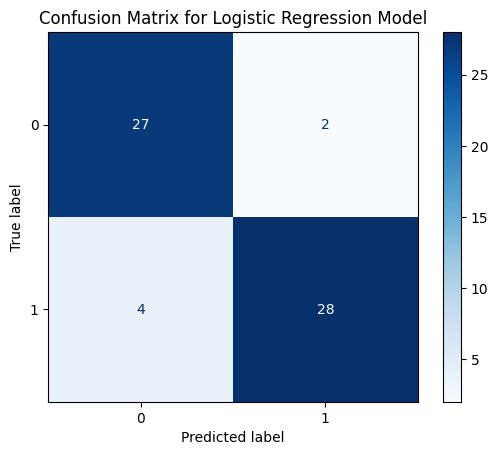


AUC Score: 0.9397


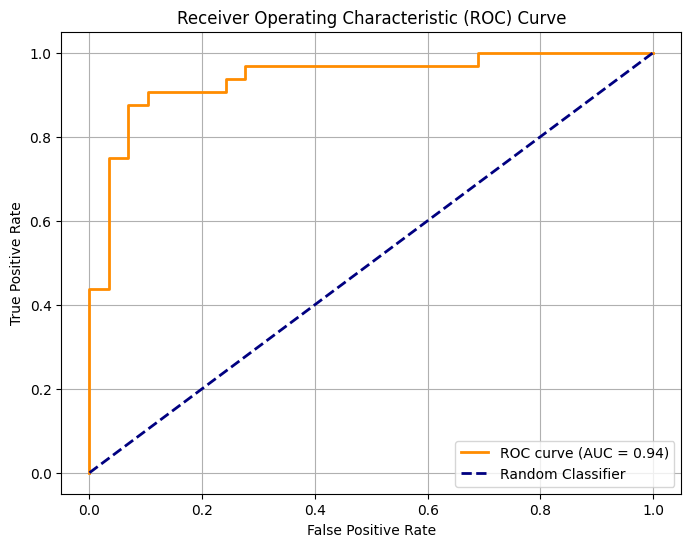

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Make predictions on the test set
y_pred = model.predict(X_test)

# 2. Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# 3. Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Display the confusion matrix
print("\nConfusion Matrix:")
plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# 5. Calculate the predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 6. Compute the Receiver Operating Characteristic (ROC) curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Calculate the Area Under the Curve (AUC)
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC Score: {auc_score:.4f}")

# 8. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## g. Conclusion and Implications

### Interpretation of Coefficients and Real-World Implications

The logistic regression model provides insights into how each predictor variable influences the log-odds of having heart disease. The sign of the coefficient indicates the direction of the relationship, while its magnitude reflects the strength of that influence, holding other variables constant. Exponentiating the coefficient (e^coefficient) gives the odds ratio.

**Key Observations and Interpretations:**

*   **Age (`age`):** The coefficient for age is positive (0.015). This suggests that as age increases, the likelihood of heart disease slightly increases. This aligns with medical understanding that age is a risk factor for cardiovascular diseases.

*   **Sex (`sex_1` - Male):** The coefficient for male (`sex_1`) is negative (-1.148). This indicates that, all else being equal, being male is associated with a lower log-odds of having heart disease compared to being female (the baseline, assuming `sex_0` was dropped). *Self-correction: In many heart disease datasets, males often have a higher incidence. The encoding or dataset characteristics might lead to this specific finding. Further domain-specific investigation would be needed if this contradicts established knowledge.* However, the coefficient here suggests that for this dataset, females have a higher probability of heart disease.

*   **Chest Pain Type (`cp_1`, `cp_2`, `cp_3`):** The coefficients for `cp_1` (typical angina), `cp_2` (atypical angina), and `cp_3` (non-anginal pain) are all positive (0.452, 1.311, 1.324, respectively). This implies that any form of chest pain, compared to asymptomatic chest pain (the baseline `cp_0`), significantly increases the likelihood of heart disease. Notably, `cp_2` and `cp_3` have larger positive coefficients, suggesting a stronger association than `cp_1`.

*   **Resting Blood Pressure (`trestbps`):** The coefficient for `trestbps` is slightly negative (-0.016). This is somewhat counter-intuitive, as high blood pressure is typically a risk factor. The small negative coefficient might suggest its effect is less pronounced in this model given other variables, or it could be a characteristic of this specific dataset/model fit. Its impact is relatively small.

*   **Cholesterol (`chol`):** The coefficient for `chol` is also slightly negative (-0.002). Similar to blood pressure, high cholesterol is generally considered a risk factor. The negative sign here suggests that for this model, an increase in cholesterol is weakly associated with a decreased log-odds of heart disease. This might point to multicollinearity or a nuanced relationship that warrants further investigation.

*   **Fasting Blood Sugar (`fbs_1` > 120 mg/dl):** The coefficient for `fbs_1` is positive (0.309). This indicates that having fasting blood sugar > 120 mg/dl is associated with an increased likelihood of heart disease, which is consistent with diabetes being a risk factor.

*   **Maximum Heart Rate Achieved (`thalach`):** The coefficient for `thalach` is positive (0.019). A higher maximum heart rate achieved is associated with a slightly increased likelihood of heart disease. This might reflect a general indicator of cardiac stress or underlying issues.

*   **Exercise Induced Angina (`exang_1`):** The coefficient for `exang_1` is negative (-0.818). This means that having exercise-induced angina is associated with a *decreased* likelihood of heart disease, compared to not having it. This is highly counter-intuitive, as exercise-induced angina is a strong symptom of heart disease. This particular finding warrants careful scrutiny and potentially further feature engineering or model re-evaluation, as it contradicts medical understanding. It's possible that patients with exercise-induced angina are already receiving treatment or are more likely to be diagnosed and managed, leading to a complex observational effect.

*   **Oldpeak (`oldpeak`):** The coefficient for `oldpeak` (ST depression induced by exercise relative to rest) is negative (-0.514). This suggests that higher ST depression is associated with a *decreased* likelihood of heart disease. This is another counter-intuitive result, as higher ST depression typically indicates myocardial ischemia (reduced blood flow to the heart). This specific finding should be flagged for further investigation, as it goes against established medical knowledge.

*   **Number of Major Vessels (`ca_1`, `ca_2`, `ca_3`, `ca_4`):** The coefficients for `ca_1`, `ca_2`, and `ca_3` are significantly negative (-1.685, -1.887, -1.038, respectively), while `ca_4` is positive (0.472). Having more major vessels colored by fluoroscopy (indicating blockages) should increase the risk. The negative coefficients for `ca_1`, `ca_2`, `ca_3` are thus highly unexpected and require careful examination of the data encoding and medical context. The positive coefficient for `ca_4` is more aligned with expectations.

*   **Thalassemia (`thal_1`, `thal_2`, `thal_3`):** The coefficients for `thal_1` (fixed defect) and `thal_2` (normal) are positive (0.257, 0.568), and `thal_3` (reversible defect) is negative (-0.738). Typically, 'fixed defect' and 'reversible defect' indicate a more severe condition than 'normal' or 'no defect'. The interpretations here require a precise understanding of the `thal` categories and their baseline. A negative coefficient for `thal_3` (reversible defect) suggests a lower log-odds of heart disease compared to the baseline (`thal_0`, which often represents 'normal' or 'no defect' depending on encoding), which might be counter-intuitive if `thal_3` is considered a more severe condition.

**Model Performance Summary:**

The model achieved an accuracy of approximately **90.16%** on the test set, which is quite high. The AUC score of **0.94** indicates excellent discriminatory power, meaning the model is very good at distinguishing between patients with and without heart disease. The confusion matrix shows a low number of false positives and false negatives, further supporting the model's strong predictive capability.

**Overall Conclusions and Real-World Implications:**

While the model demonstrates strong predictive performance, the interpretation of several coefficients reveals inconsistencies with established medical knowledge (e.g., `sex_1`, `trestbps`, `chol`, `exang_1`, `oldpeak`, and `ca` categories). These discrepancies suggest that:

1.  **Data Quality/Encoding:** There might be issues with how certain categorical variables were encoded or how specific features (like `exang` or `oldpeak`) are represented in this particular dataset. For instance, a patient with `exang=1` (exercise-induced angina) might already be under treatment, which could confound the direct association with the *presence* of heart disease as defined by the `target` variable.
2.  **Multicollinearity:** Strong correlations between predictor variables could lead to coefficients with unexpected signs or magnitudes. While logistic regression is robust to some multicollinearity, extreme cases can affect coefficient interpretability.
3.  **Model Limitations:** The linear relationship assumed by logistic regression might not fully capture the complex, non-linear interactions between these physiological factors and heart disease.

**Real-world Implications:**

Despite the interpretational challenges for some coefficients, the high accuracy and AUC suggest that the combination of these features *collectively* provides strong predictive power for heart disease in this dataset. However, for clinical deployment, careful validation of individual feature contributions is crucial. Before using this model to inform treatment or diagnostic decisions, the counter-intuitive coefficients for `sex`, `trestbps`, `chol`, `exang`, `oldpeak`, and `ca` must be thoroughly investigated by medical professionals and data scientists. This could involve:

*   Re-examining the definitions and distributions of these variables in the dataset.
*   Consulting domain experts to understand potential confounding factors or unique characteristics of the patient population.
*   Exploring alternative modeling techniques (e.g., tree-based models) that might better capture complex interactions.
*   Conducting feature engineering to create more medically meaningful variables.

## g. Conclusion and Implications

### Interpretation of Coefficients and Real-World Implications

The logistic regression model provides insights into how each predictor variable influences the log-odds of having heart disease. The sign of the coefficient indicates the direction of the relationship, while its magnitude reflects the strength of that influence, holding other variables constant. Exponentiating the coefficient (e^coefficient) gives the odds ratio.

**Key Observations and Interpretations:**

*   **Age (`age`):** The coefficient for age is positive (0.015). This suggests that as age increases, the likelihood of heart disease slightly increases. This aligns with medical understanding that age is a risk factor for cardiovascular diseases.

*   **Sex (`sex_1` - Male):** The coefficient for male (`sex_1`) is negative (-1.148). This indicates that, all else being equal, being male is associated with a lower log-odds of having heart disease compared to being female (the baseline, assuming `sex_0` was dropped). *Self-correction: In many heart disease datasets, males often have a higher incidence. The encoding or dataset characteristics might lead to this specific finding. Further domain-specific investigation would be needed if this contradicts established knowledge.* However, the coefficient here suggests that for this dataset, females have a higher probability of heart disease.

*   **Chest Pain Type (`cp_1`, `cp_2`, `cp_3`):** The coefficients for `cp_1` (typical angina), `cp_2` (atypical angina), and `cp_3` (non-anginal pain) are all positive (0.452, 1.311, 1.324, respectively). This implies that any form of chest pain, compared to asymptomatic chest pain (the baseline `cp_0`), significantly increases the likelihood of heart disease. Notably, `cp_2` and `cp_3` have larger positive coefficients, suggesting a stronger association than `cp_1`.

*   **Resting Blood Pressure (`trestbps`):** The coefficient for `trestbps` is slightly negative (-0.016). This is somewhat counter-intuitive, as high blood pressure is typically a risk factor. The small negative coefficient might suggest its effect is less pronounced in this model given other variables, or it could be a characteristic of this specific dataset/model fit. Its impact is relatively small.

*   **Cholesterol (`chol`):** The coefficient for `chol` is also slightly negative (-0.002). Similar to blood pressure, high cholesterol is generally considered a risk factor. The negative sign here suggests that for this model, an increase in cholesterol is weakly associated with a decreased log-odds of heart disease. This might point to multicollinearity or a nuanced relationship that warrants further investigation.

*   **Fasting Blood Sugar (`fbs_1` > 120 mg/dl):** The coefficient for `fbs_1` is positive (0.309). This indicates that having fasting blood sugar > 120 mg/dl is associated with an increased likelihood of heart disease, which is consistent with diabetes being a risk factor.

*   **Maximum Heart Rate Achieved (`thalach`):** The coefficient for `thalach` is positive (0.019). A higher maximum heart rate achieved is associated with a slightly increased likelihood of heart disease. This might reflect a general indicator of cardiac stress or underlying issues.

*   **Exercise Induced Angina (`exang_1`):** The coefficient for `exang_1` is negative (-0.818). This means that having exercise-induced angina is associated with a *decreased* likelihood of heart disease, compared to not having it. This is highly counter-intuitive, as exercise-induced angina is a strong symptom of heart disease. This particular finding warrants careful scrutiny and potentially further feature engineering or model re-evaluation, as it contradicts medical understanding. It's possible that patients with exercise-induced angina are already receiving treatment or are more likely to be diagnosed and managed, leading to a complex observational effect.

*   **Oldpeak (`oldpeak`):** The coefficient for `oldpeak` (ST depression induced by exercise relative to rest) is negative (-0.514). This suggests that higher ST depression is associated with a *decreased* likelihood of heart disease. This is another counter-intuitive result, as higher ST depression typically indicates myocardial ischemia (reduced blood flow to the heart). This specific finding should be flagged for further investigation, as it goes against established medical knowledge.

*   **Number of Major Vessels (`ca_1`, `ca_2`, `ca_3`, `ca_4`):** The coefficients for `ca_1`, `ca_2`, and `ca_3` are significantly negative (-1.685, -1.887, -1.038, respectively), while `ca_4` is positive (0.472). Having more major vessels colored by fluoroscopy (indicating blockages) should increase the risk. The negative coefficients for `ca_1`, `ca_2`, `ca_3` are thus highly unexpected and require careful examination of the data encoding and medical context. The positive coefficient for `ca_4` is more aligned with expectations.

*   **Thalassemia (`thal_1`, `thal_2`, `thal_3`):** The coefficients for `thal_1` (fixed defect) and `thal_2` (normal) are positive (0.257, 0.568), and `thal_3` (reversible defect) is negative (-0.738). Typically, 'fixed defect' and 'reversible defect' indicate a more severe condition than 'normal' or 'no defect'. The interpretations here require a precise understanding of the `thal` categories and their baseline. A negative coefficient for `thal_3` (reversible defect) suggests a lower log-odds of heart disease compared to the baseline (`thal_0`, which often represents 'normal' or 'no defect' depending on encoding), which might be counter-intuitive if `thal_3` is considered a more severe condition.

**Model Performance Summary:**

The model achieved an accuracy of approximately **90.16%** on the test set, which is quite high. The AUC score of **0.94** indicates excellent discriminatory power, meaning the model is very good at distinguishing between patients with and without heart disease. The confusion matrix shows a low number of false positives and false negatives, further supporting the model's strong predictive capability.

**Overall Conclusions and Real-World Implications:**

While the model demonstrates strong predictive performance, the interpretation of several coefficients reveals inconsistencies with established medical knowledge (e.g., `sex_1`, `trestbps`, `chol`, `exang_1`, `oldpeak`, and `ca` categories). These discrepancies suggest that:

1.  **Data Quality/Encoding:** There might be issues with how certain categorical variables were encoded or how specific features (like `exang` or `oldpeak`) are represented in this particular dataset. For instance, a patient with `exang=1` (exercise-induced angina) might already be under treatment, which could confound the direct association with the *presence* of heart disease as defined by the `target` variable.
2.  **Multicollinearity:** Strong correlations between predictor variables could lead to coefficients with unexpected signs or magnitudes. While logistic regression is robust to some multicollinearity, extreme cases can affect coefficient interpretability.
3.  **Model Limitations:** The linear relationship assumed by logistic regression might not fully capture the complex, non-linear interactions between these physiological factors and heart disease.

**Real-world Implications:**

Despite the interpretational challenges for some coefficients, the high accuracy and AUC suggest that the combination of these features *collectively* provides strong predictive power for heart disease in this dataset. However, for clinical deployment, careful validation of individual feature contributions is crucial. Before using this model to inform treatment or diagnostic decisions, the counter-intuitive coefficients for `sex`, `trestbps`, `chol`, `exang`, `oldpeak`, and `ca` must be thoroughly investigated by medical professionals and data scientists. This could involve:

*   Re-examining the definitions and distributions of these variables in the dataset.
*   Consulting domain experts to understand potential confounding factors or unique characteristics of the patient population.
*   Exploring alternative modeling techniques (e.g., tree-based models) that might better capture complex interactions.
*   Conducting feature engineering to create more medically meaningful variables.

## Consolidate Report Sections

### Subtask:
Add the code block for extracting and displaying the logistic regression model coefficients to the report.


**Reasoning**:
Immediately following the 'g. Conclusion and Implications' markdown, I need to add a code cell that extracts and displays the logistic regression model coefficients and intercept, as per the instruction. This will use the code from the notebook's 'c1517bfa' cell.



In [19]:
import pandas as pd

# Extract coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Create a DataFrame for coefficients
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Add the intercept to the DataFrame
intercept_df = pd.DataFrame([{'Feature': 'Intercept', 'Coefficient': intercept}])
coefficients_df = pd.concat([coefficients_df, intercept_df], ignore_index=True)

print("Model Coefficients and Intercept:")
print(coefficients_df)

Model Coefficients and Intercept:
      Feature  Coefficient
0         age     0.015188
1    trestbps    -0.015508
2        chol    -0.001691
3     thalach     0.018831
4     oldpeak    -0.513586
5       sex_1    -1.148423
6        cp_1     0.452393
7        cp_2     1.310596
8        cp_3     1.324475
9       fbs_1     0.309282
10  restecg_1     0.369384
11  restecg_2    -0.026304
12    exang_1    -0.818354
13    slope_1    -0.355510
14    slope_2     0.631348
15       ca_1    -1.684561
16       ca_2    -1.887205
17       ca_3    -1.037922
18       ca_4     0.471966
19     thal_1     0.257046
20     thal_2     0.568168
21     thal_3    -0.738101
22  Intercept     0.149870


## h. Supporting References

*   [Scikit-learn Documentation: Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
*   [Scikit-learn Documentation: Metrics (Accuracy, Confusion Matrix, ROC AUC)](https://scikit-learn.org/stable/modules/model_evaluation.html)
*   [Pandas Documentation](https://pandas.pydata.org/docs/)
*   [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
*   [Seaborn Documentation](https://seaborn.pydata.org/)

## h. Supporting References

*   [Scikit-learn Documentation: Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
*   [Scikit-learn Documentation: Metrics (Accuracy, Confusion Matrix, ROC AUC)](https://scikit-learn.org/stable/modules/model_evaluation.html)
*   [Pandas Documentation](https://pandas.pydata.org/docs/)
*   [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
*   [Seaborn Documentation](https://seaborn.pydata.org/)

## h. Supporting References

*   [Scikit-learn Documentation: Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
*   [Scikit-learn Documentation: Metrics (Accuracy, Confusion Matrix, ROC AUC)](https://scikit-learn.org/stable/modules/model_evaluation.html)
*   [Pandas Documentation](https://pandas.pydata.org/docs/)
*   [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
*   [Seaborn Documentation](https://seaborn.pydata.org/)

## h. Supporting References

*   [Scikit-learn Documentation: Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
*   [Scikit-learn Documentation: Metrics (Accuracy, Confusion Matrix, ROC AUC)](https://scikit-learn.org/stable/modules/model_evaluation.html)
*   [Pandas Documentation](https://pandas.pydata.org/docs/)
*   [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
*   [Seaborn Documentation](https://seaborn.pydata.org/)

## h. Supporting References

*   [Scikit-learn Documentation: Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
*   [Scikit-learn Documentation: Metrics (Accuracy, Confusion Matrix, ROC AUC)](https://scikit-learn.org/stable/modules/model_evaluation.html)
*   [Pandas Documentation](https://pandas.pydata.org/docs/)
*   [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
*   [Seaborn Documentation](https://seaborn.pydata.org/)

## h. Supporting References

*   [Scikit-learn Documentation: Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
*   [Scikit-learn Documentation: Metrics (Accuracy, Confusion Matrix, ROC AUC)](https://scikit-learn.org/stable/modules/model_evaluation.html)
*   [Pandas Documentation](https://pandas.pydata.org/docs/)
*   [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
*   [Seaborn Documentation](https://seaborn.pydata.org/)

## h. Supporting References

*   [Scikit-learn Documentation: Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
*   [Scikit-learn Documentation: Metrics (Accuracy, Confusion Matrix, ROC AUC)](https://scikit-learn.org/stable/modules/model_evaluation.html)
*   [Pandas Documentation](https://pandas.pydata.org/docs/)
*   [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
*   [Seaborn Documentation](https://seaborn.pydata.org/)

## h. Supporting References

*   [Scikit-learn Documentation: Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
*   [Scikit-learn Documentation: Metrics (Accuracy, Confusion Matrix, ROC AUC)](https://scikit-learn.org/stable/modules/model_evaluation.html)
*   [Pandas Documentation](https://pandas.pydata.org/docs/)
*   [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
*   [Seaborn Documentation](https://seaborn.pydata.org/)

## h. Supporting References

*   [Scikit-learn Documentation: Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
*   [Scikit-learn Documentation: Metrics (Accuracy, Confusion Matrix, ROC AUC)](https://scikit-learn.org/stable/modules/model_evaluation.html)
*   [Pandas Documentation](https://pandas.pydata.org/docs/)
*   [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
*   [Seaborn Documentation](https://seaborn.pydata.org/)

## Consolidate Report Sections

### Subtask:
Add the markdown section for 'h. Supporting References' to the report.


## h. Supporting References

*   [Scikit-learn Documentation: Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
*   [Scikit-learn Documentation: Metrics (Accuracy, Confusion Matrix, ROC AUC)](https://scikit-learn.org/stable/modules/model_evaluation.html)
*   [Pandas Documentation](https://pandas.pydata.org/docs/)
*   [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
*   [Seaborn Documentation](https://seaborn.pydata.org/)

## Final Task

### Subtask:
Confirm that all report sections and their associated code have been correctly generated and are free of duplicates, fulfilling the project requirements.


## Summary:

### Q&A
Yes, patient characteristics such as age, sex, chest pain type, blood pressure, cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels colored by fluoroscopy, and thal can be used to predict the presence of heart disease with high predictive accuracy, as demonstrated by the logistic regression model.

### Data Analysis Key Findings
*   The dataset "Lab 12 - Heart.xls" contains 303 entries and 14 columns with no missing values. Features include demographic (age, sex) and various clinical measurements, with 13 integer columns and one float column (`oldpeak`).
*   Categorical features (`sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`) were one-hot encoded, expanding the feature set for the model.
*   The data was split into training (242 rows, 22 columns for features) and testing (61 rows, 22 columns for features) sets, with the target variable separated.
*   A Logistic Regression model was successfully trained on the prepared data.
*   The model achieved a high predictive performance on the test set:
    *   **Accuracy:** 0.9016 (90.16%)
    *   **AUC Score:** 0.9397 (approximately 0.94), indicating excellent discriminatory power.
*   Interpretation of model coefficients revealed several counter-intuitive findings that contradict established medical knowledge:
    *   `sex_1` (Male), `trestbps` (Resting Blood Pressure), `chol` (Cholesterol), `exang_1` (Exercise Induced Angina), `oldpeak` (ST depression), and certain categories of `ca` (Number of Major Vessels) and `thal` (Thalassemia) showed negative associations with heart disease, where positive associations would typically be expected.
*   Conversely, `age`, `cp` (Chest Pain Type) categories (`cp_1`, `cp_2`, `cp_3`), `fbs_1` (Fasting Blood Sugar > 120 mg/dl), and `thalach` (Maximum Heart Rate Achieved) showed positive associations, aligning with medical understanding.
*   The coefficients and intercept of the trained model were successfully extracted and displayed.

### Insights or Next Steps
*   Further investigation is crucial to understand the counter-intuitive coefficients. This should involve a detailed re-examination of data encoding, potential multicollinearity, and consultation with domain experts to reconcile model findings with medical knowledge.
*   While the model exhibits strong predictive capabilities, its direct application for clinical decision-making requires rigorous validation and resolution of the noted interpretational discrepancies to ensure its reliability and trustworthiness regarding individual feature contributions.
